<IPython.core.display.Javascript object>


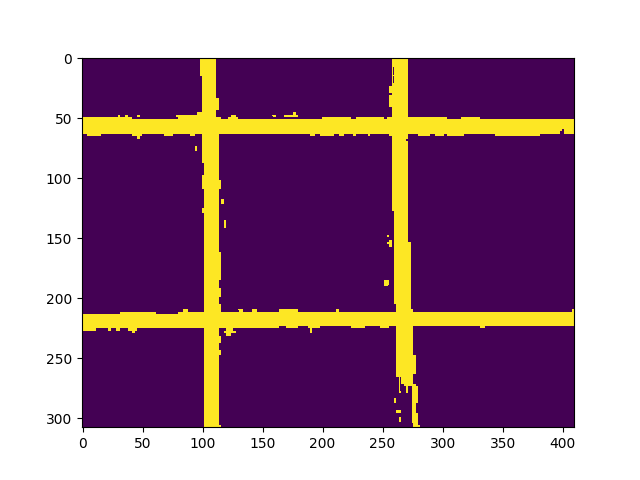

In [1]:
%matplotlib notebook

import cv2
import numpy as np
import matplotlib.pyplot as plt
import py_grid_finder as gr
from math import cos, sin

video = cv2.VideoCapture("../Video/DroneCam.mp4")
for i in range(142):
# for i in range(235):
# for i in range(320):
    result, image = video.read()

# result, image = cv2.VideoCapture("../Images/TestWorstCase.png").read()

assert(result)
# image = cv2.flip(image, 0)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

lower_red1 = np.array([0, 30, 0])
upper_red1 = np.array([10, 255, 255])
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)

lower_red2 = np.array([170, 30, 0])
upper_red2 = np.array([180, 255, 255])
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

mask = mask1 | mask2
plt.imshow(mask)
plt.show()


LineResult((200, 218), 14, 0°)
LineResult((200, 218), 14, 179°)
LineResult((267, 190), 14, 269°)
LineResult((108, 192), 14, 269°)
LineResult((236, 57), 16, 180°)
(267, 218)
(108, 220)
(265, 57)
(106, 57)


<IPython.core.display.Javascript object>


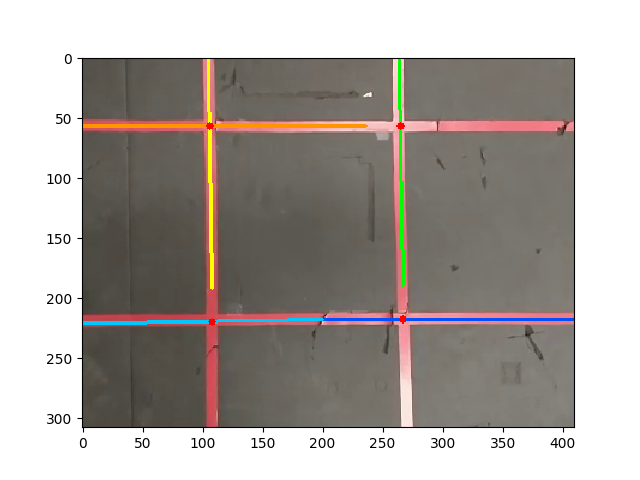

In [2]:
gf = gr.GridFinder(mask)
square = gf.findSquare()

def showLine(line, color, image=image):
    # print(line.getLineCenter())
    # print(line.getAngle())
    # print(line.getWidth())
    if line:
        print(line)
        p1 = (line.getLineCenter().x, line.getLineCenter().y)
        p2 = (line.getLineCenter().x + int(2 * 410 * cos(line.getAngle())), 
              line.getLineCenter().y + int(2 * 410 * sin(line.getAngle())))
        cv2.line(image, p1, p2, color, 2)

showLine(square.lines[0], (0, 80, 255))
showLine(square.lines[1], (0, 200, 255))
showLine(square.lines[2], (0, 255, 0))
showLine(square.lines[3], (255, 255, 0))
showLine(square.lines[4], (255, 150, 0))

for point in square.points:
    if point:
        point = (round(point.x), round(point.y))
        print(point)
        cv2.circle(image, point, 3, (255, 0, 0), -1)

plt.figure()
plt.imshow(image)
plt.show()

In [7]:
gf = gr.GridFinder(mask)
print(gf.getMaskMatrixCpp())

TMatrix<uint8_t, 308, 410> mask = {{
    {0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0